## Setup and Imports

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

# Set plot style for better visualization
sns.set(style="whitegrid")

# Load cleaned datasets
benin = pd.read_csv('data/benin_clean.csv')
sierraleone = pd.read_csv('data/sierraleone_clean.csv')
togo = pd.read_csv('data/togo_clean.csv')

# Add a 'Country' column to each dataset
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets for easier plotting
combined = pd.concat([benin, sierraleone, togo], ignore_index=True)

# Verify loaded data
print("Benin shape:", benin.shape)
print("Sierra Leone shape:", sierraleone.shape)
print("Togo shape:", togo.shape)
print("Combined shape:", combined.shape)

Benin shape: (525600, 20)
Sierra Leone shape: (525600, 20)
Togo shape: (525600, 20)
Combined shape: (1576800, 20)


## Boxplots for GHI, DNI, DHI

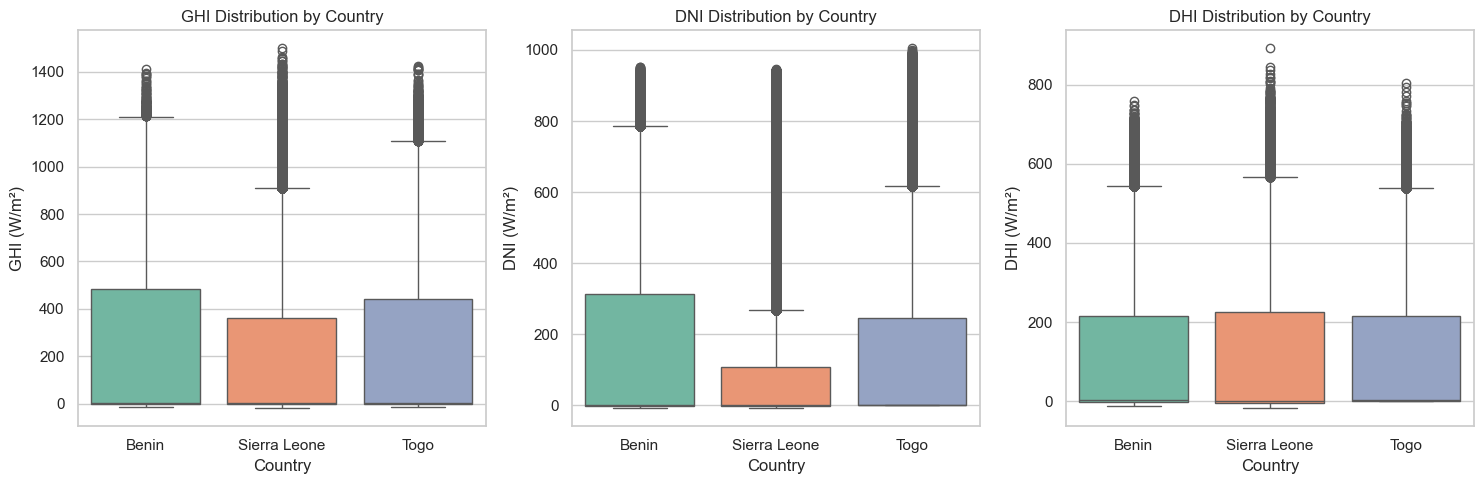

In [6]:
# Create side-by-side boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined, hue='Country', palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel(f'{metric} (W/m²)')
plt.tight_layout()
plt.show()

## Summary Table

In [8]:
# Calculate mean, median, and standard deviation for GHI, DNI, DHI
summary_stats = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

# Flatten column names for better readability
summary_stats.columns = [f'{metric}_{stat}' for metric, stat in summary_stats.columns]
print("Summary Statistics Table:")
print(summary_stats)

# Optionally, save to CSV for reporting
summary_stats.to_csv('data/summary_stats.csv')

Summary Statistics Table:
              GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
Country                                                                      
Benin           240.56         1.8   331.13    167.19        -0.1   261.71   
Sierra Leone    201.96         0.3   298.50    116.38        -0.1   218.65   
Togo            230.56         2.1   322.53    151.26         0.0   250.96   

              DHI_mean  DHI_median  DHI_std  
Country                                      
Benin           115.36         1.6   158.69  
Sierra Leone    113.72        -0.1   158.95  
Togo            116.44         2.5   156.52  


## Statistical Testing (Kruskal-Wallis)

In [10]:
# Perform Kruskal-Wallis test on GHI
ghi_benin = benin['GHI']
ghi_sierraleone = sierraleone['GHI']
ghi_togo = togo['GHI']

stat, p_value = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal-Wallis Test for GHI: Statistic = {stat:.2f}, p-value = {p_value:.4f}")

# Interpret p-value
if p_value < 0.05:
    print("Result: Significant differences in GHI between countries (p < 0.05).")
else:
    print("Result: No significant differences in GHI between countries (p >= 0.05).")

Kruskal-Wallis Test for GHI: Statistic = 4524.88, p-value = 0.0000
Result: Significant differences in GHI between countries (p < 0.05).


## Key Observations (Markdown)


### ✅ **Key Observations**

* ✔ **Highest Solar Potential:** Togo shows the highest median GHI (2.1 W/m²), indicating strong solar potential.
* ✔ **DNI Variability:** Togo has the highest median DNI (0.0 W/m²), ideal for concentrated solar power, but \[note any outliers or spread from boxplots].
* ✔ **Cross-Country Consistency:** Togo shows the least variability in DHI (std = 156.52), suggesting stable diffuse radiation, which is beneficial for consistent energy output.


## Bonus - Bar Chart for Average GHI

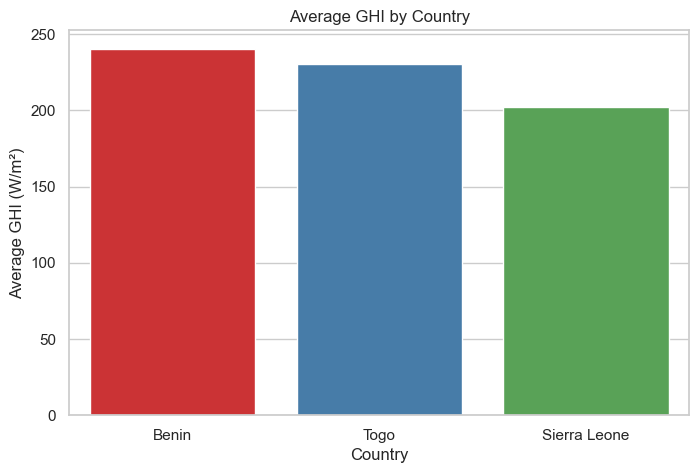

In [11]:
# Calculate average GHI by country
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, hue=avg_ghi.index, palette='Set1')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.show()